# Iris Flowers Classification ML Project: 

### By Anuroop Arya

## Problem statement:

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris 

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the data

df = pd.read_csv('iris.csv')

In [3]:
# Display the first 5 rows of the dataset

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepalLength  sepalWidth  petalLength  petalWidth      species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [4]:
# Statistical summary of the dataset

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       sepalLength  sepalWidth  petalLength  petalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


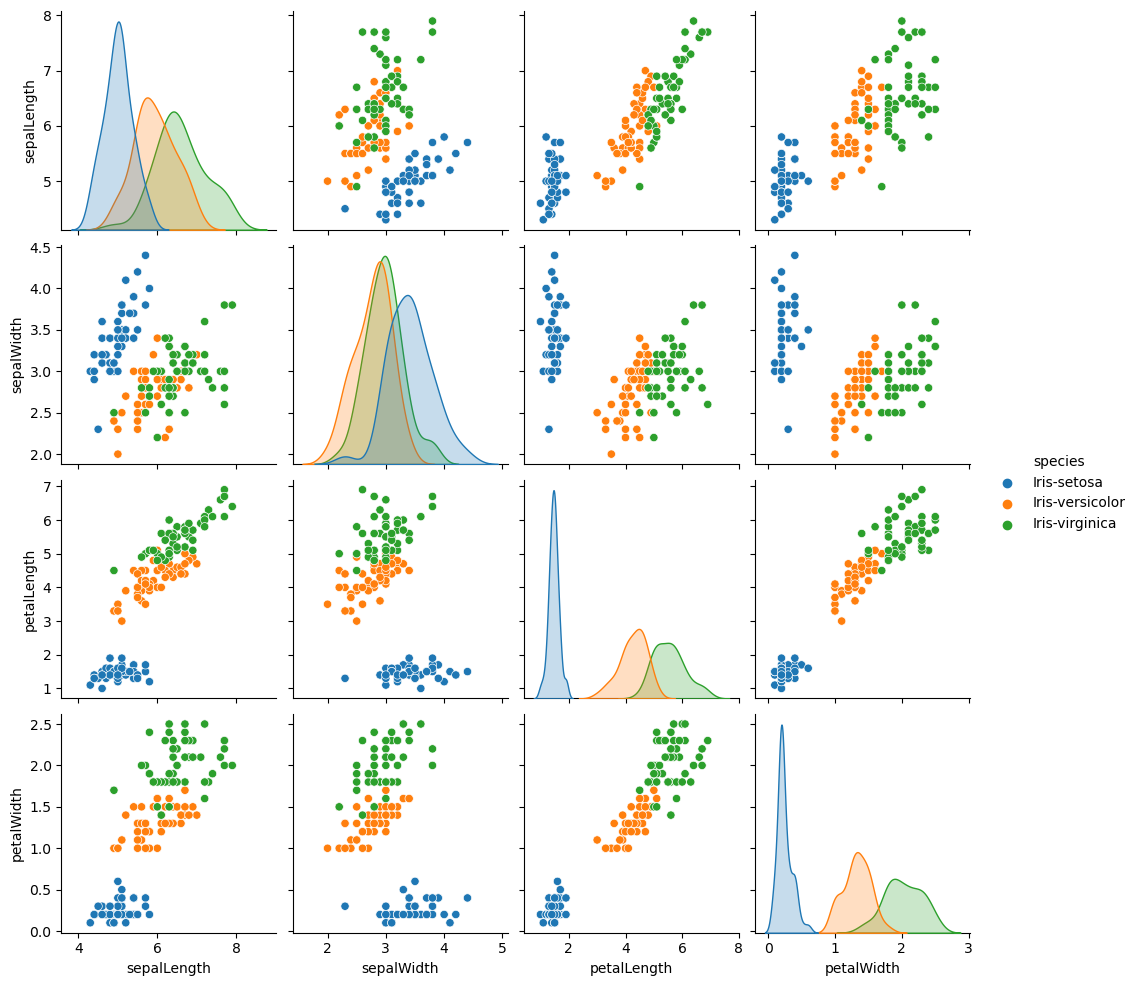

In [5]:
# Visualize the dataset

sns.pairplot(df, hue='species')
plt.show()

In [6]:
# Separate features and target

X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values

In [7]:
# Calculate the average of each feature for all classes

Y_Data = np.array([np.average(X[:, i][Y == j].astype('float32')) for i in range(X.shape[1]) for j in np.unique(Y)])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(X.shape[1])
width = 0.25

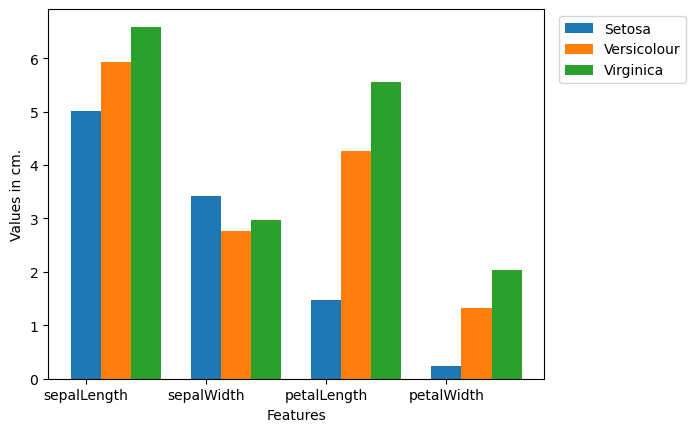

In [8]:
# Plot the average

plt.bar(X_axis, Y_Data_reshaped[0], width, label='Setosa')
plt.bar(X_axis + width, Y_Data_reshaped[1], width, label='Versicolour')
plt.bar(X_axis + width * 2, Y_Data_reshaped[2], width, label='Virginica')
plt.xticks(X_axis, df.columns[:4])
plt.xlabel("Features")
plt.ylabel("Values in cm.")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [9]:
# Split the data into train and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Support Vector Machine Algorithm

model_svc = SVC()
model_svc.fit(X_train, Y_train)
prediction_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(Y_test, prediction_svc)
print("Accuracy (Support Vector Machine):", accuracy_svc * 100)


Accuracy (Support Vector Machine): 100.0


In [11]:
# Logistic Regression

model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)
prediction_LR = model_LR.predict(X_test)
accuracy_LR = accuracy_score(Y_test, prediction_LR)
print("Accuracy (Logistic Regression):", accuracy_LR * 100)


Accuracy (Logistic Regression): 100.0


In [12]:
# Decision Tree Classifier

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
prediction_DTC = model_DTC.predict(X_test)
accuracy_DTC = accuracy_score(Y_test, prediction_DTC)
print("Accuracy (Decision Tree Classifier):", accuracy_DTC * 100)


Accuracy (Decision Tree Classifier): 100.0


In [13]:
# A detailed classification report

print("Classification Report (Logistic Regression):")
print(classification_report(Y_test, prediction_LR))

Classification Report (Logistic Regression):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

